# Introduction
This is an exercise from the Data Analysis course of Free Code Camp.
Page View Time Series Visualizer
https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer

The idea is to answer some questions to do some practice.

Data origin: from Free Code Camp itself

My final doc on the Camp repo (not working correctly):
https://replit.com/@PedroTealdi/boilerplate-page-view-time-series-visualizer#time_series_visualizer.py 

My final doc on Hithub:
https://github.com/petert92/Page_View_Time_Series_Visualizer_freeCodeCamp.git


## Questions
- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
- Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
- Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". - Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.

# Imports

In [95]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introductional data study

In [96]:
# Import data
df = pd.read_csv('fcc-forum-pageviews.csv')
df_original = df.copy() # for development purposes

In [3]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [4]:
df.info()
# 1304 rows, 2 features: 'date' and 'value' [int]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [16]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


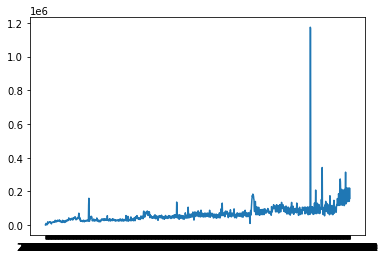

In [6]:
df_sort = df.sort_values(by='date')
plt.plot(df_sort['date'], df_sort['value'])

# Answers

In [97]:
# Set date as index
df.set_index('date', drop=True, inplace=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [98]:
# Filter out views in the top 2.5% or bottom 2.5% of the data
df_filtered = df.loc[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]
df_filtered.index = pd.to_datetime(df_filtered.index)
df_filtered
# 1238 rows (95% of 1304, correct)

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


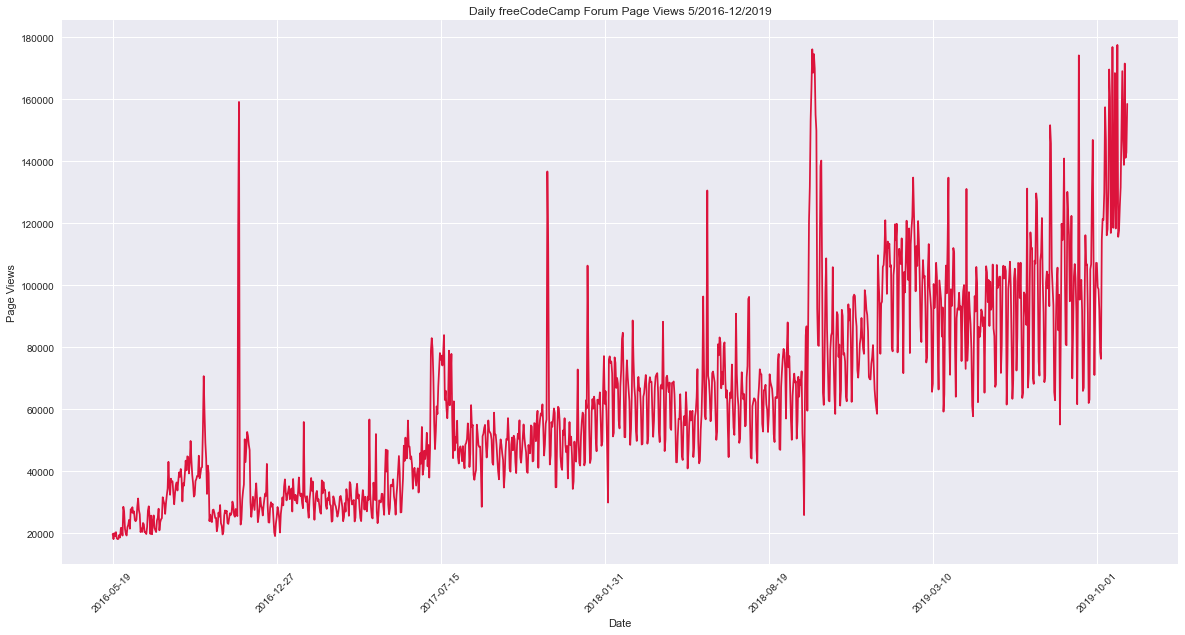

In [87]:
# Time serie line plot: value vs date
fig = plt.figure(facecolor=None, edgecolor='red', figsize=(20, 10))
# x-axis: date
ax = fig.add_subplot()
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
# y-axis: page views
plt.ylabel('Page Views')
# line-plot y vs x
ax.spines[:].visible = True
ax.spines[:].linewidth = 2
ax.spines[:].edgecolor = 'back'
# line-plot y vs x
ax.plot(df_filtered.sort_index().index, df_filtered.sort_index().value, '#DC143C')

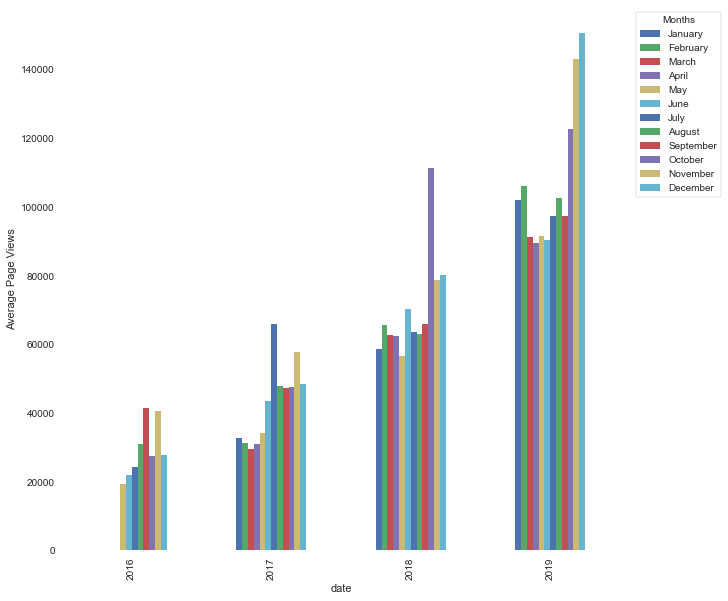

In [184]:
# Bar plot: monthly average per year
import datetime, re
fig, ax = plt.subplots(figsize=(10,10), frameon=True, edgecolor='black', facecolor='white')
ax.set_frame_on(True)
ax.spines[:].visible = True
ax.spines[:].linewidth = 2
ax.spines[:].edgecolor = 'back'
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')

bar_plot = df_filtered.groupby([df_filtered.index.year, df_filtered.index.month]).mean().unstack()
bar_plot.plot(ax = ax, kind='bar').set_facecolor('white')

handles, labels = ax.get_legend_handles_labels()
new_labels = [datetime.date(1900, int(re.findall(r'\d+', monthinteger)[0]), 1).strftime('%B') for monthinteger in labels]
ax.legend(handles = handles, labels = new_labels, loc = 'upper left', bbox_to_anchor = (1.02, 1), title = 'Months', edgecolor = 'gray', frameon=True, facecolor='white')

plt.show()

In [235]:
# Prepare data for box plots (this part is done!)
df_box = df_filtered.copy()
df_box.reset_index(inplace=True)

# Create year feature
df_box['year'] = [d.year for d in df_box.date]

# Create month feature and set as categorical type so it can be sorted by month (thanks to 'months' list that's already sorted)
df_box['month'] = [d.strftime('%b') for d in df_box.date]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_box['month'] = pd.Categorical(df_box['month'], categories=months, ordered=True)

# Set date feature to datetime64[ns] type
df_box['date'] = df_box['date'].astype('datetime64[ns]')
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


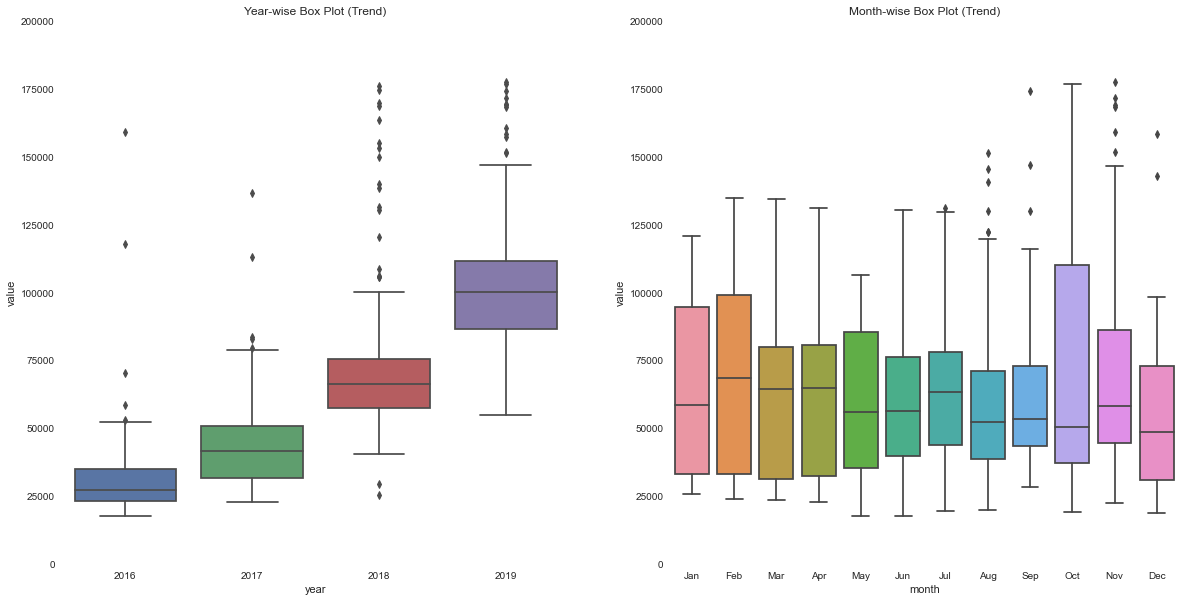

In [237]:
# Bloxplot: monthly distribution and yearly distribution
# Year boxplot
fig = plt.figure(figsize=(20,10), frameon=True, edgecolor='black', facecolor='white')
plt.subplot(1,2,1, frameon=True, facecolor='white')
plt.title('Year-wise Box Plot (Trend)')
plt.ylim(0,200000)
plt.xlabel('Years')
sns.boxplot(x='year', y='value', data=df_box.sort_values(by='year'))

# Month boxplot
plt.subplot(1,2,2, frameon=True, facecolor='white')
plt.title('Month-wise Box Plot (Trend)')
plt.ylim(0,200000)
plt.xlabel('Months')
df_soprted = df_box.sort_values(by='month')
sns.boxplot(x='month', y='value', data=df_soprted)
plt.show()